In [2]:
import cv2 as cv

In [4]:
!pip install plantcv
import plantcv


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 285 kB 4.1 MB/s 
     |████████████████████████████████| 41 kB 673 kB/s 


In [5]:
import plantcv
     

In [6]:
import plantcv.plantcv

In [7]:
from plantcv import plantcv as pcv
import matplotlib

In [8]:
class options:
    def __init__(self):
        self.image = "/content/fruit.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

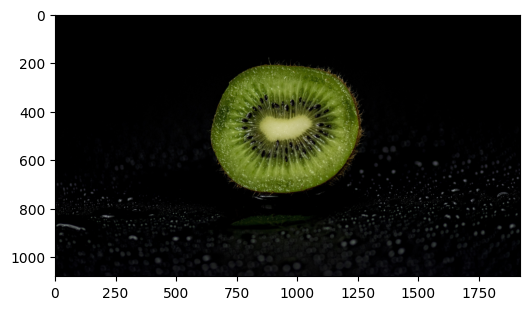

In [9]:
img, path, filename = pcv.readimage(filename=args.image)

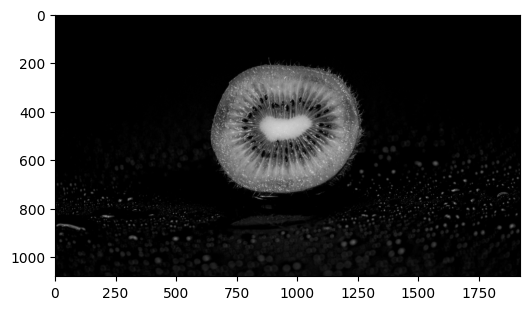

In [19]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='v')

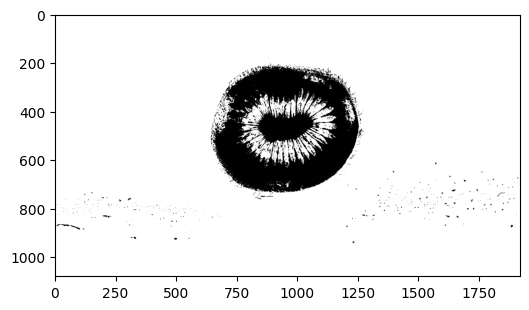

In [36]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85
                                , max_value=255, object_type='dark')

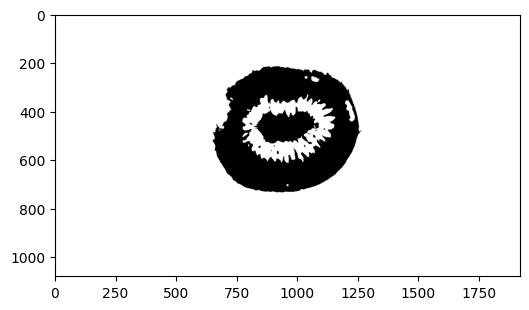

In [37]:
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=12)

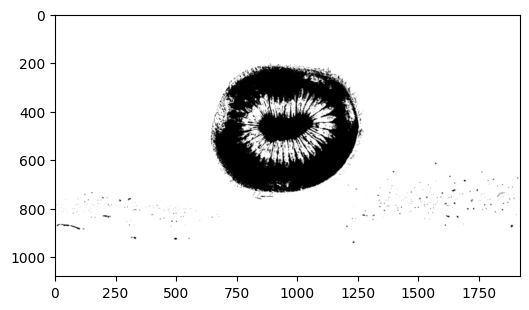

In [41]:
gaussian_img = pcv.gaussian_blur(img=s_thresh, ksize=(5, 5), sigma_x=0, sigma_y=None)

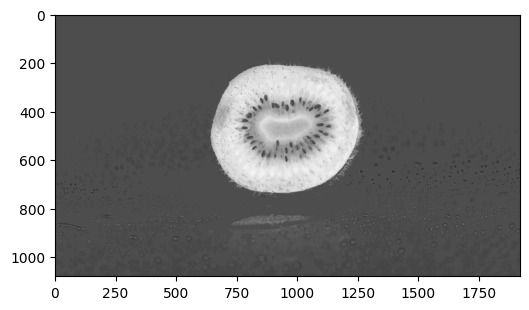

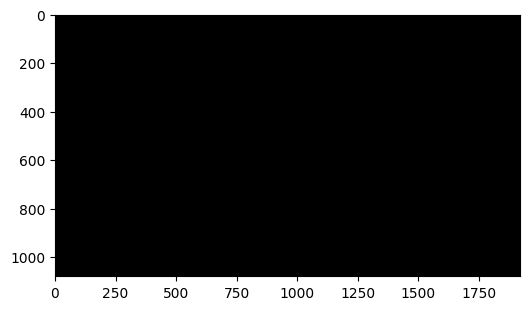

In [44]:
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

# Threshold the blue channel image 
b_thresh = pcv.threshold.binary(gray_img=b, threshold=80, max_value=255, 
                                object_type='light')

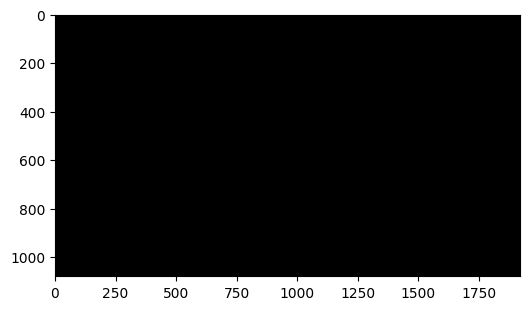

In [45]:
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)

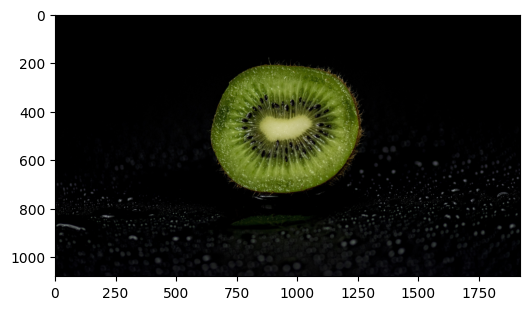

In [46]:
masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')

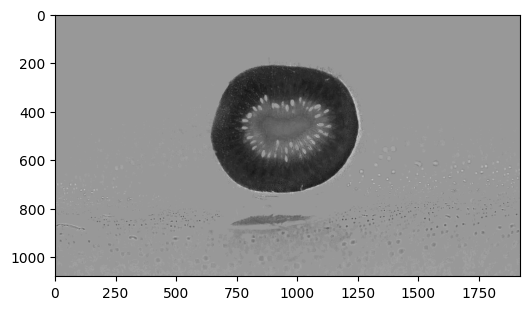

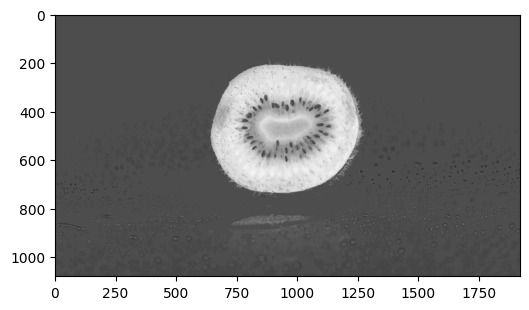

In [47]:
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

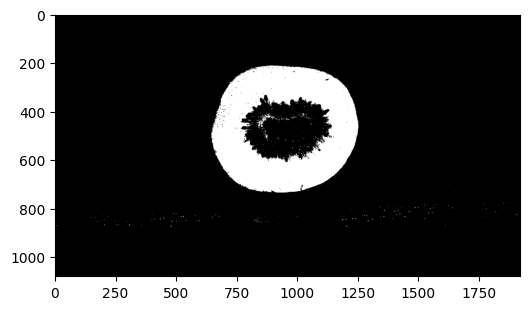

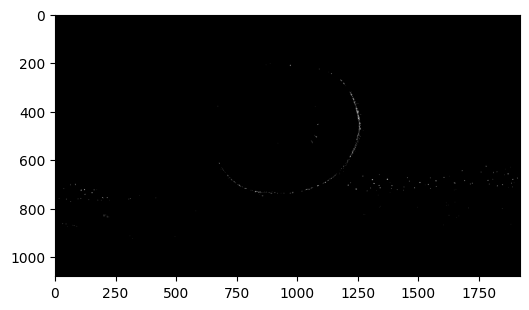

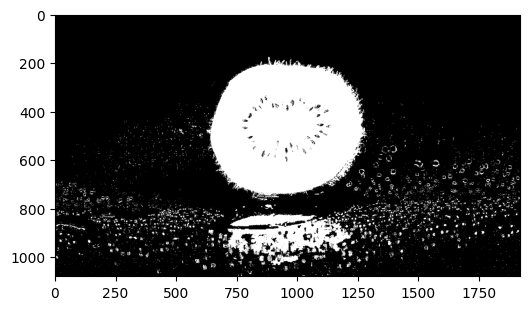

In [48]:
maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, 
                                      max_value=255, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, 
                                       max_value=255, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, 
                                      max_value=255, object_type='light')

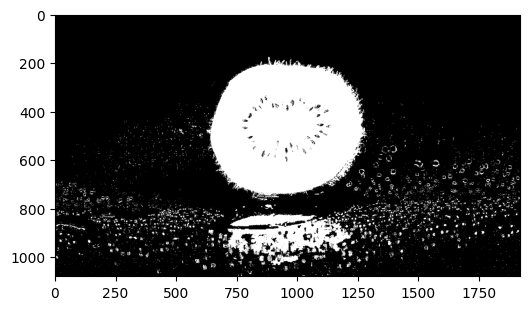

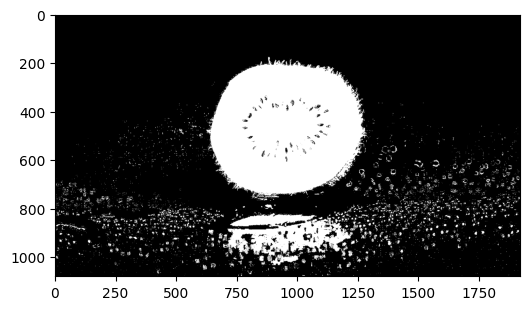

In [49]:
ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

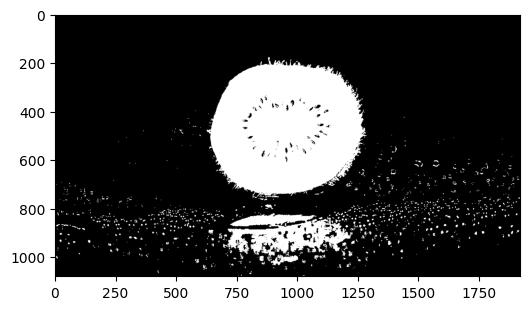

In [50]:
opened_ab = pcv.opening(gray_img=ab)

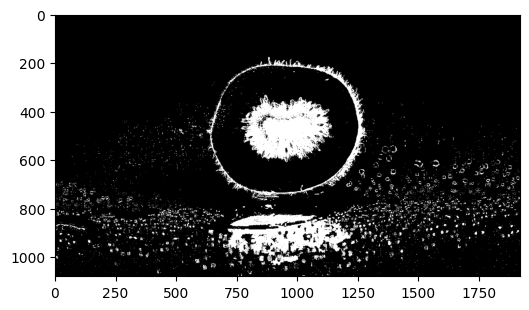

In [51]:
xor_img = pcv.logical_xor(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)


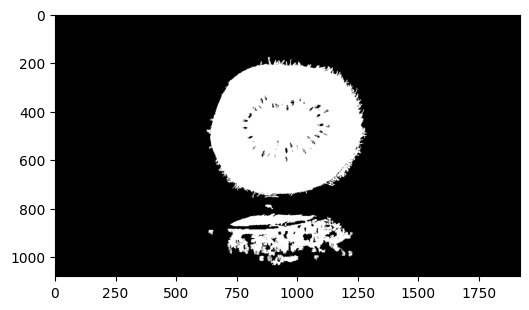

In [52]:
ab_fill = pcv.fill(bin_img=ab, size=200)

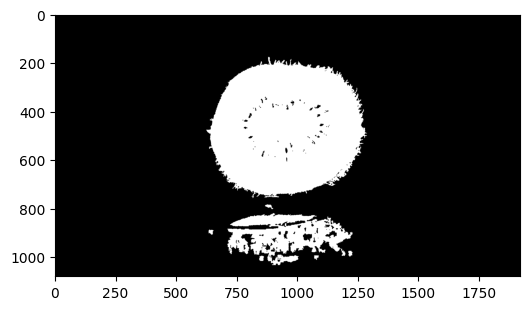

In [53]:
closed_ab = pcv.closing(gray_img=ab_fill)

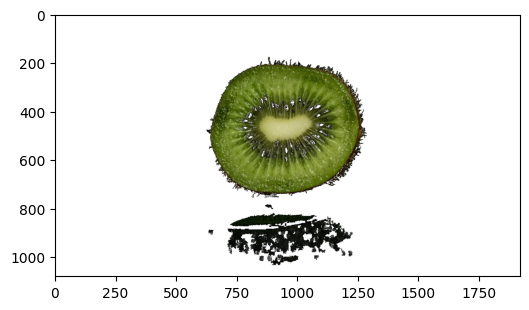

In [54]:
masked2 = pcv.apply_mask(img=masked, mask=ab_fill, mask_color='white')

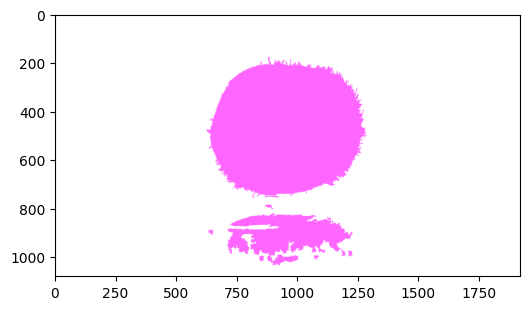

In [55]:
id_objects, obj_hierarchy = pcv.find_objects(img=masked2, mask=ab_fill)

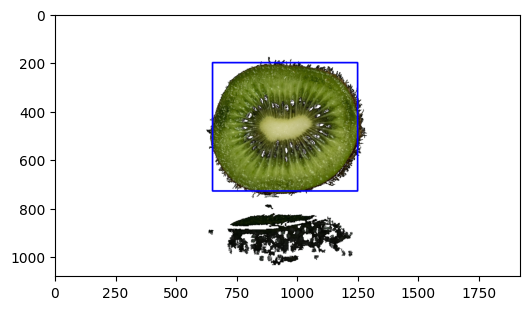

In [59]:
roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=650, y=200, 
                                       h=530, w=600)

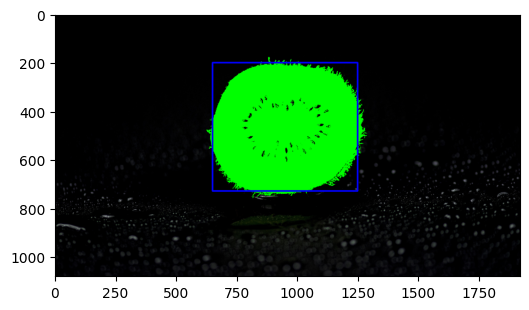

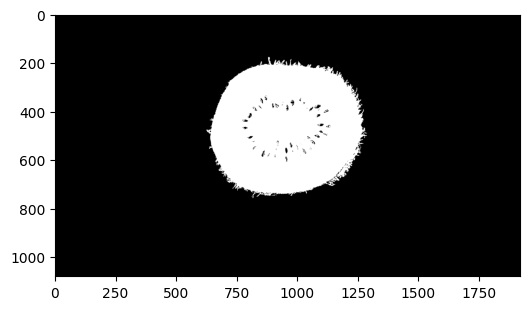

In [60]:
roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1, 
                                                               roi_hierarchy=roi_hierarchy, 
                                                               object_contour=id_objects, 
                                                               obj_hierarchy=obj_hierarchy,
                                                               roi_type='partial')

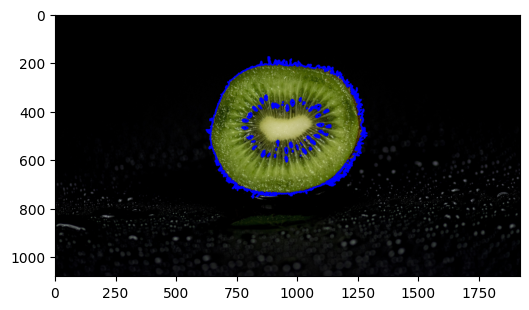

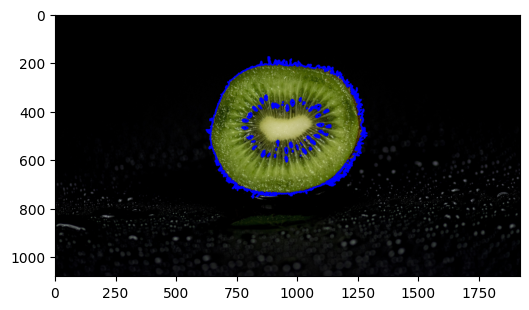

In [61]:
obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)

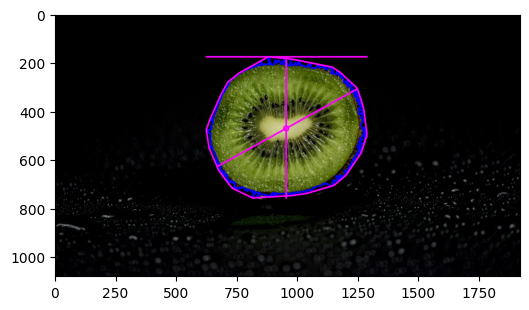

In [62]:
analysis_image = pcv.analyze_object(img=img, obj=obj, mask=mask, label="default")

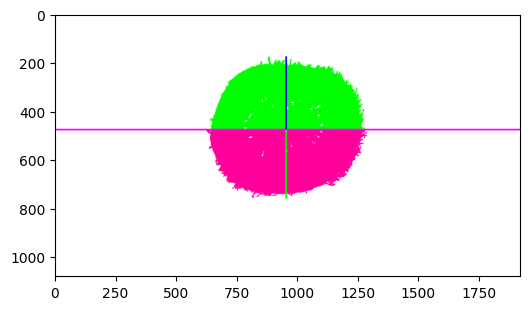

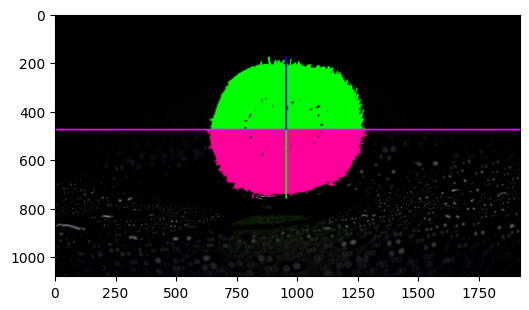

In [66]:
boundary_image2 = pcv.analyze_bound_horizontal(img=img, obj=obj, mask=mask, 
                                               line_position=480, label="default")

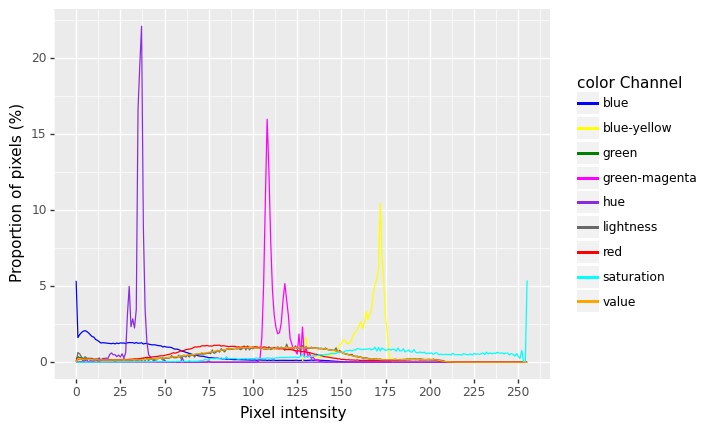

In [67]:
color_histogram = pcv.analyze_color(rgb_img=img, mask=kept_mask, colorspaces='all', label="default")